In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn 
import sklearn


In [2]:
#our dataset is about energy consumption

#timeseries : past data we count on to predict future values

In [3]:
#conda install -c conda-forge xgboost

In [4]:
import xgboost

In [5]:
alpha = pandas.read_csv('energyDataset/PJME_hourly.csv')

In [6]:
alpha

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0
...,...,...
145361,2018-01-01 20:00:00,44284.0
145362,2018-01-01 21:00:00,43751.0
145363,2018-01-01 22:00:00,42402.0
145364,2018-01-01 23:00:00,40164.0


In [7]:
alpha=alpha.set_index('Datetime')

In [8]:
alpha

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0
...,...
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0


In [9]:
alpha.index#object 


Index(['2002-12-31 01:00:00', '2002-12-31 02:00:00', '2002-12-31 03:00:00',
       '2002-12-31 04:00:00', '2002-12-31 05:00:00', '2002-12-31 06:00:00',
       '2002-12-31 07:00:00', '2002-12-31 08:00:00', '2002-12-31 09:00:00',
       '2002-12-31 10:00:00',
       ...
       '2018-01-01 15:00:00', '2018-01-01 16:00:00', '2018-01-01 17:00:00',
       '2018-01-01 18:00:00', '2018-01-01 19:00:00', '2018-01-01 20:00:00',
       '2018-01-01 21:00:00', '2018-01-01 22:00:00', '2018-01-01 23:00:00',
       '2018-01-02 00:00:00'],
      dtype='object', name='Datetime', length=145366)

In [10]:
pandas.to_datetime(alpha.index)

DatetimeIndex(['2002-12-31 01:00:00', '2002-12-31 02:00:00',
               '2002-12-31 03:00:00', '2002-12-31 04:00:00',
               '2002-12-31 05:00:00', '2002-12-31 06:00:00',
               '2002-12-31 07:00:00', '2002-12-31 08:00:00',
               '2002-12-31 09:00:00', '2002-12-31 10:00:00',
               ...
               '2018-01-01 15:00:00', '2018-01-01 16:00:00',
               '2018-01-01 17:00:00', '2018-01-01 18:00:00',
               '2018-01-01 19:00:00', '2018-01-01 20:00:00',
               '2018-01-01 21:00:00', '2018-01-01 22:00:00',
               '2018-01-01 23:00:00', '2018-01-02 00:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=145366, freq=None)

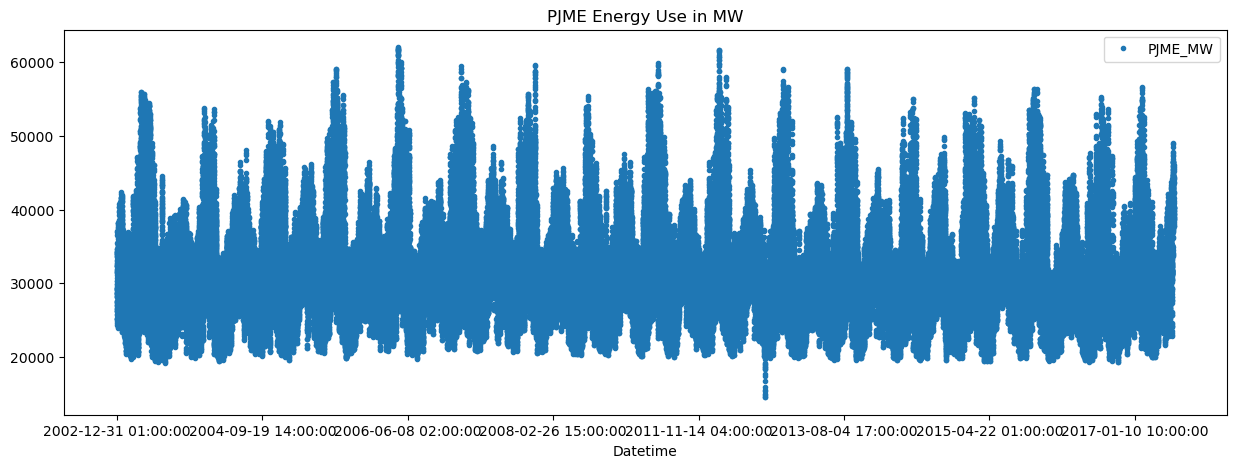

In [11]:
alpha.plot(style='.',
        figsize=(15, 5),
        title='PJME Energy Use in MW')
plt.show()

In [12]:
alpha.index=pandas.to_datetime(alpha.index)


<AxesSubplot: xlabel='Datetime'>

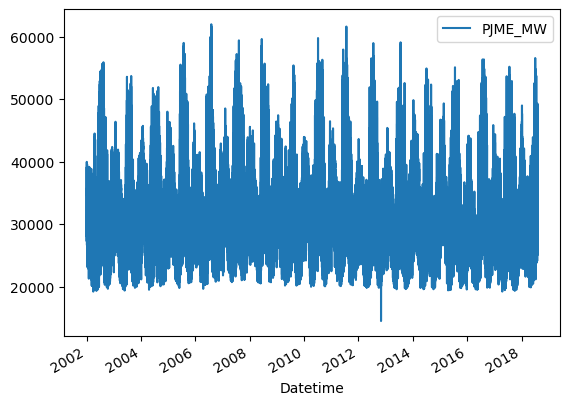

In [13]:
alpha.plot()#better 

In [14]:
##TRAIN AND TEST SPLIT
#train= past
#test = "future" 

In [15]:
train = alpha.loc[alpha.index < '01-01-2015']
test = alpha.loc[alpha.index >= '01-01-2015']

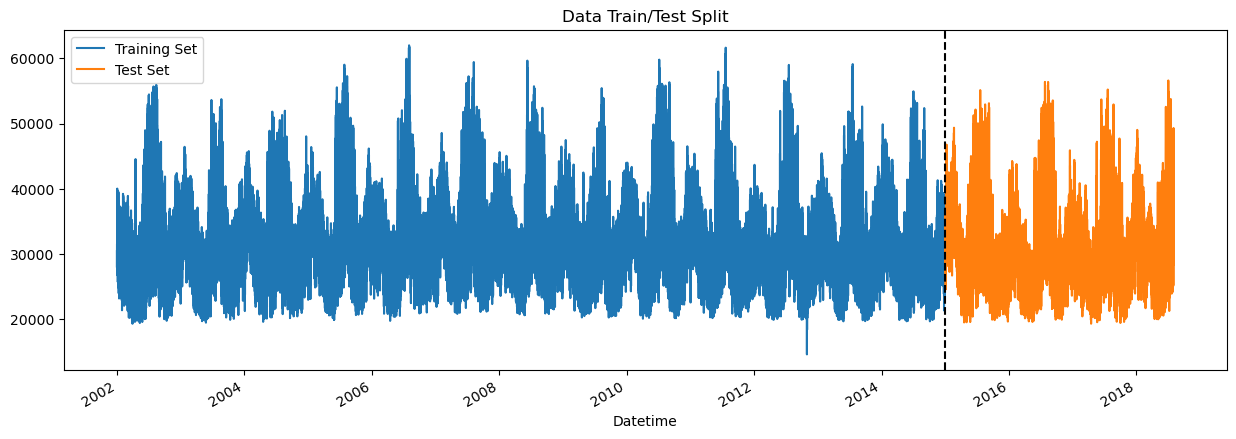

In [16]:
fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2015', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

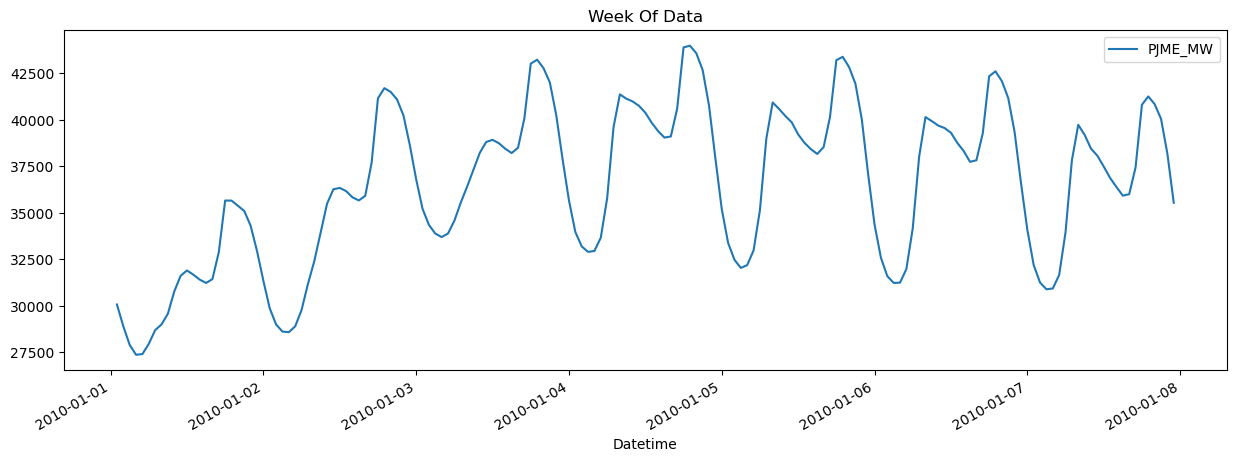

In [17]:
alpha.loc[(alpha.index > '01-01-2010') & (alpha.index < '01-08-2010')] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

In [18]:
df=alpha

In [19]:
df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek
df['quarter'] = df.index.quarter
df['month'] = df.index.month
df['year'] = df.index.year
df['dayofyear'] = df.index.dayofyear
df['dayofmonth'] = df.index.day
df['weekofyear'] = df.index.isocalendar().week

In [20]:
df

,PJME_MW,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Datetime,,,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,4,12,2002,365,31,1
2002-12-31 02:00:00,25147.0,2,1,4,12,2002,365,31,1
2002-12-31 03:00:00,24574.0,3,1,4,12,2002,365,31,1
2002-12-31 04:00:00,24393.0,4,1,4,12,2002,365,31,1
2002-12-31 05:00:00,24860.0,5,1,4,12,2002,365,31,1
...,...,...,...,...,...,...,...,...,...
2018-01-01 20:00:00,44284.0,20,0,1,1,2018,1,1,1
2018-01-01 21:00:00,43751.0,21,0,1,1,2018,1,1,1
2018-01-01 22:00:00,42402.0,22,0,1,1,2018,1,1,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145366 entries, 2002-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   PJME_MW     145366 non-null  float64
 1   hour        145366 non-null  int64  
 2   dayofweek   145366 non-null  int64  
 3   quarter     145366 non-null  int64  
 4   month       145366 non-null  int64  
 5   year        145366 non-null  int64  
 6   dayofyear   145366 non-null  int64  
 7   dayofmonth  145366 non-null  int64  
 8   weekofyear  145366 non-null  UInt32 
dtypes: UInt32(1), float64(1), int64(7)
memory usage: 10.7 MB


In [22]:
df['weekofyear']=df['weekofyear'].astype('int')

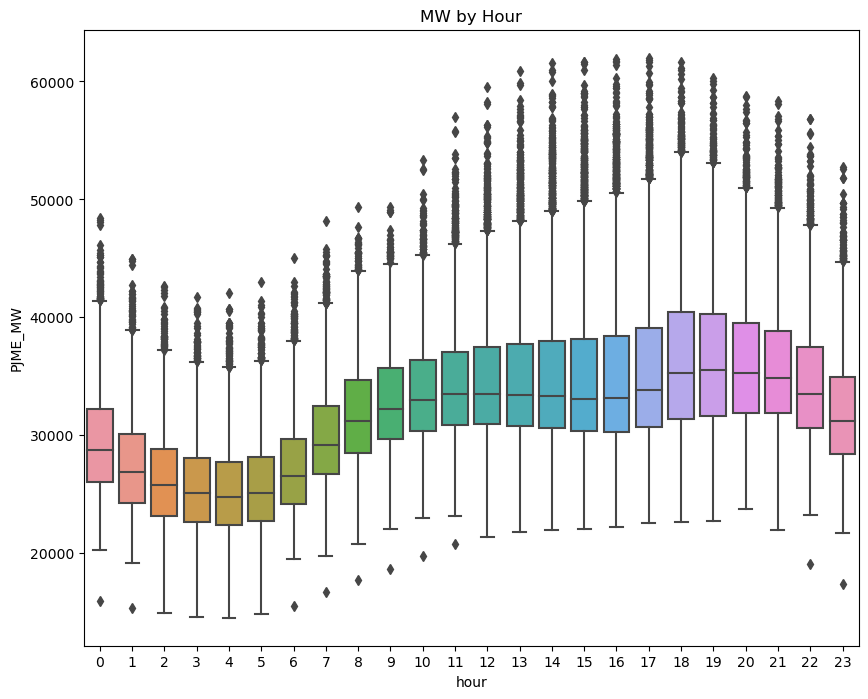

In [23]:
fig, ax = plt.subplots(figsize=(10, 8))
seaborn.boxplot(data=df, x='hour', y='PJME_MW')
ax.set_title('MW by Hour')
plt.show()


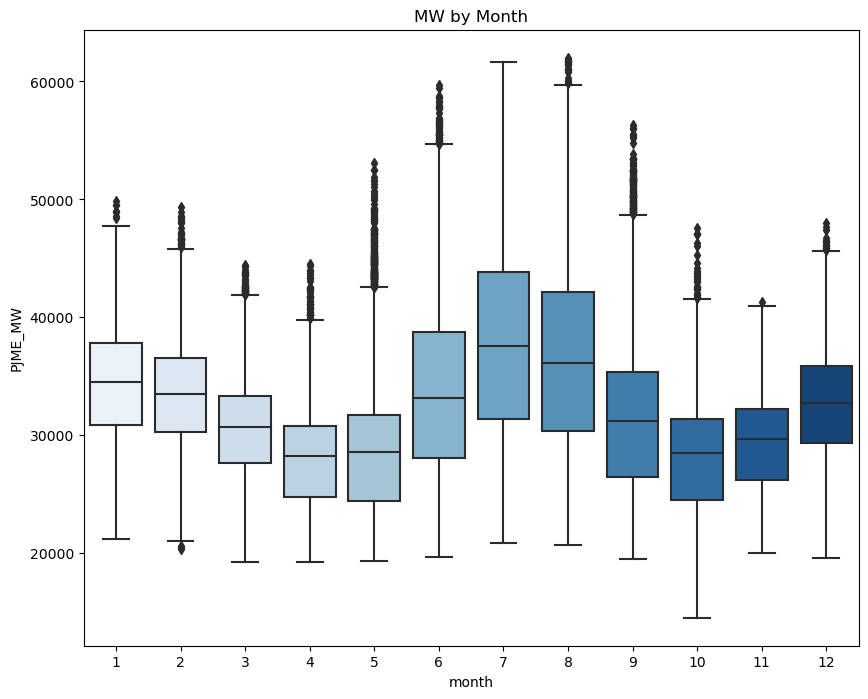

In [24]:
fig, ax = plt.subplots(figsize=(10, 8))
seaborn.boxplot(data=df, x='month', y='PJME_MW', palette='Blues')
ax.set_title('MW by Month')
plt.show()

In [25]:
train2 = df.loc[df.index < '01-01-2015']
test2 = df.loc[df.index >= '01-01-2015']

In [30]:
yTrain=train2.pop('PJME_MW')
xTrain=train2

KeyError: 'PJME_MW'

In [27]:
#yTrain
#xTrain

In [29]:
yTest=test2.pop('PJME_MW')
xTest=test2

KeyError: 'PJME_MW'

In [31]:
machine = xgboost.XGBRegressor(n_estimators=1000,early_stopping_rounds=50)
#estimators = trees
#rounds = posh ipomoni na kanei otan den beltiwnetai to modelo
                     


In [32]:
machine.fit(xTrain, yTrain,
        eval_set=[(xTrain, yTrain), (xTest, yTest)],
        verbose=True) 
# True =1  , mporeis na baleis 10
#gia na mi bgazei toses polles seires

[0]	validation_0-rmse:23192.06388	validation_1-rmse:22274.70707
[1]	validation_0-rmse:16422.16231	validation_1-rmse:15526.15532
[2]	validation_0-rmse:11739.38192	validation_1-rmse:10990.33828
[3]	validation_0-rmse:8542.62977	validation_1-rmse:7893.45826
[4]	validation_0-rmse:6395.38042	validation_1-rmse:5905.68976
[5]	validation_0-rmse:4993.35550	validation_1-rmse:4823.60120
[6]	validation_0-rmse:4106.63407	validation_1-rmse:4250.83446
[7]	validation_0-rmse:3587.25700	validation_1-rmse:3947.95041
[8]	validation_0-rmse:3263.20528	validation_1-rmse:3824.59644
[9]	validation_0-rmse:3082.82048	validation_1-rmse:3771.46895
[10]	validation_0-rmse:2983.65302	validation_1-rmse:3737.99339
[11]	validation_0-rmse:2867.23593	validation_1-rmse:3754.77559
[12]	validation_0-rmse:2788.49423	validation_1-rmse:3793.91951
[13]	validation_0-rmse:2748.22611	validation_1-rmse:3842.00841
[14]	validation_0-rmse:2674.59689	validation_1-rmse:3851.06108
[15]	validation_0-rmse:2652.45145	validation_1-rmse:3850.57

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [33]:
#after the 10th rep , validation_1-rmse is rising instead of falling. and never gets better
#this is called overfitting

In [34]:
machine2 = xgboost.XGBRegressor(n_estimators=1000,early_stopping_rounds=50,learning_rate=0.01)

In [35]:
#learrning rate = 0.01 (the model is trainig slower than before)
machine2.fit(xTrain, yTrain,
        eval_set=[(xTrain, yTrain), (xTest, yTest)],
        verbose=20) 

[0]	validation_0-rmse:32601.87768	validation_1-rmse:31654.68421
[20]	validation_0-rmse:26744.69134	validation_1-rmse:25790.46354
[40]	validation_0-rmse:21967.23811	validation_1-rmse:21031.36537
[60]	validation_0-rmse:18075.00782	validation_1-rmse:17171.48813
[80]	validation_0-rmse:14909.35367	validation_1-rmse:14039.91309
[100]	validation_0-rmse:12341.93512	validation_1-rmse:11516.90737
[120]	validation_0-rmse:10265.63159	validation_1-rmse:9535.18516
[140]	validation_0-rmse:8594.64936	validation_1-rmse:7970.52672
[160]	validation_0-rmse:7259.14759	validation_1-rmse:6757.49764
[180]	validation_0-rmse:6200.86940	validation_1-rmse:5844.06136
[200]	validation_0-rmse:5371.61499	validation_1-rmse:5156.86497
[220]	validation_0-rmse:4725.74522	validation_1-rmse:4658.20820
[240]	validation_0-rmse:4230.76062	validation_1-rmse:4315.86017
[260]	validation_0-rmse:3856.59907	validation_1-rmse:4078.60205
[280]	validation_0-rmse:3576.40978	validation_1-rmse:3924.61737
[300]	validation_0-rmse:3368.4638

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [36]:
#this time it stopped in the 440 round

In [37]:
reg = xgboost.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)


In [38]:
reg.fit(xTrain, yTrain,
        eval_set=[(xTrain, yTrain), (xTest, yTest)],
        verbose=20) 

[11:19:12] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:32605.13860	validation_1-rmse:31657.15907
[20]	validation_0-rmse:26811.58771	validation_1-rmse:25879.76819
[40]	validation_0-rmse:22084.60001	validation_1-rmse:21168.85004
[60]	validation_0-rmse:18235.32575	validation_1-rmse:17338.47576
[80]	validation_0-rmse:15103.64273	validation_1-rmse:14230.94235
[100]	validation_0-rmse:12581.21026	validation_1-rmse:11743.71599
[120]	validation_0-rmse:10552.79414	validation_1-rmse:9762.63039
[140]	validation_0-rmse:8924.82730	validation_1-rmse:8192.60296
[160]	validation_0-rmse:7633.63843	validation_1-rmse:6974.32399
[180]	validation_0-rmse:6619.53237	validation_1-rmse:6047.54735
[200]	validation_0-rmse:5833.47946	validation_1-rmse:5362.26584
[220]	validation_0-rmse:5222.32315	validation_1-rmse:4862.87352
[240]	validation_0-rmse:4749.58271	validation_1-rm

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

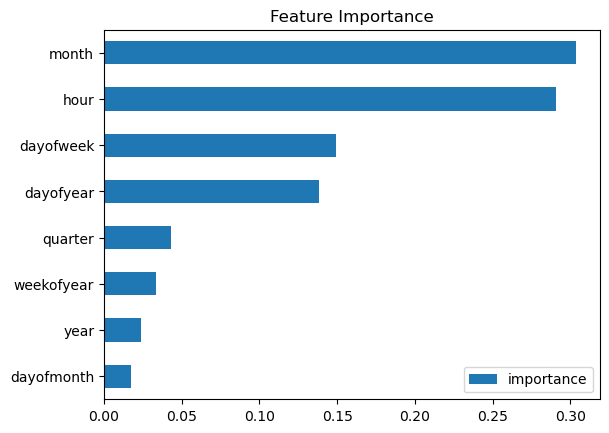

In [39]:
#feuature importance
fi = pandas.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

In [40]:
fi    #SUM =1

,importance
hour,0.290558
dayofweek,0.149426
quarter,0.042914
month,0.303849
year,0.023893
dayofyear,0.138339
dayofmonth,0.017594
weekofyear,0.033429


# PREDICTIONS

In [41]:
machinePredictions = machine.predict(xTest)
machine2Predictions = machine2.predict(xTest)
regPredictions = reg.predict(xTest)

In [42]:
#regPredictions

In [43]:
score = numpy.sqrt(sklearn.metrics.mean_squared_error(yTest, machinePredictions))
score2 = numpy.sqrt(sklearn.metrics.mean_squared_error(yTest, machine2Predictions))
score3 = numpy.sqrt(sklearn.metrics.mean_squared_error(yTest, regPredictions))

In [44]:
score

3737.9933870079594

In [45]:
score2

3712.051163198029

In [46]:
score3

3728.4790521331865

# ADVANCED METHODS

In [47]:
beta = pandas.read_csv('energyDataset/PJME_hourly.csv')
beta = beta.set_index('Datetime')
beta.index=pandas.to_datetime(beta.index)

In [48]:
beta

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0
...,...
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0


In [49]:
#searching for outliers

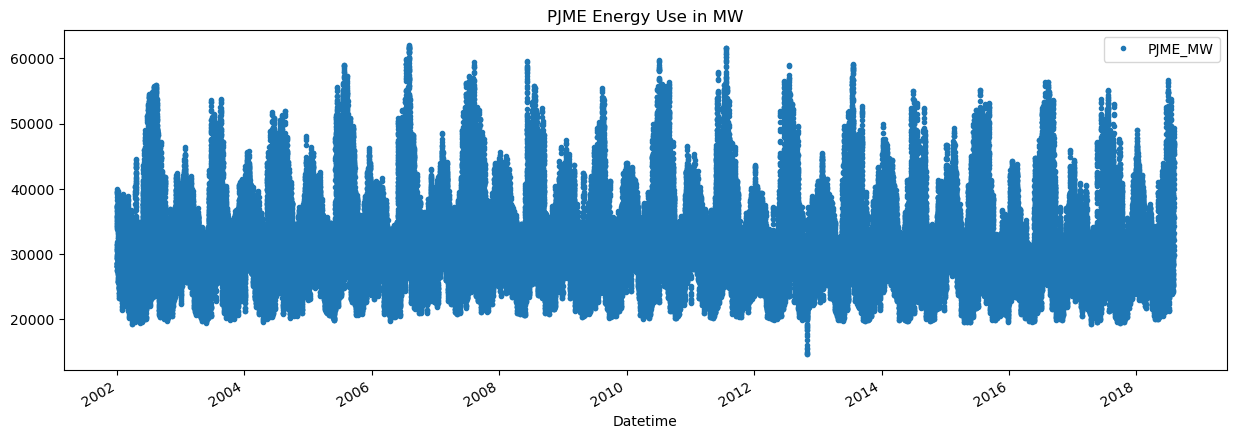

In [50]:
beta.plot(style='.',
        figsize=(15, 5),
        title='PJME Energy Use in MW')
plt.show()

In [51]:
#we can observe some outliers in 2013

<AxesSubplot: ylabel='Frequency'>

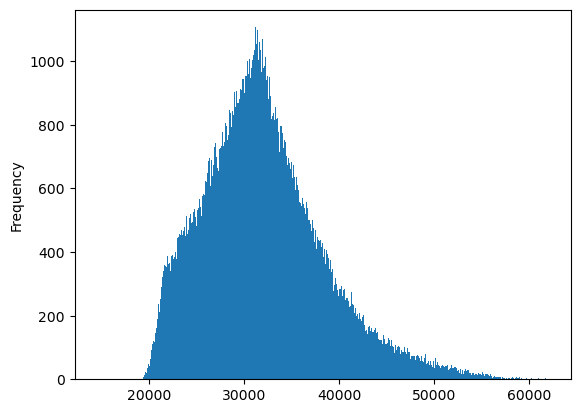

In [52]:
beta['PJME_MW'].plot(kind='hist', bins=500)

<AxesSubplot: title={'center': 'Outliers'}, xlabel='Datetime'>

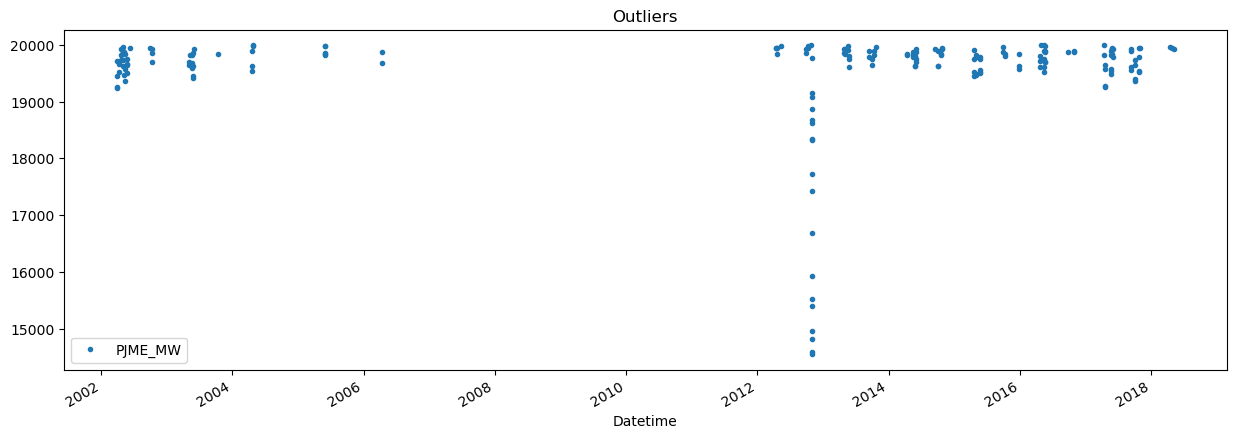

In [53]:
beta.query('PJME_MW < 20_000') .plot(style='.',figsize=(15, 5),title='Outliers')

<AxesSubplot: title={'center': 'Outliers'}, xlabel='Datetime'>

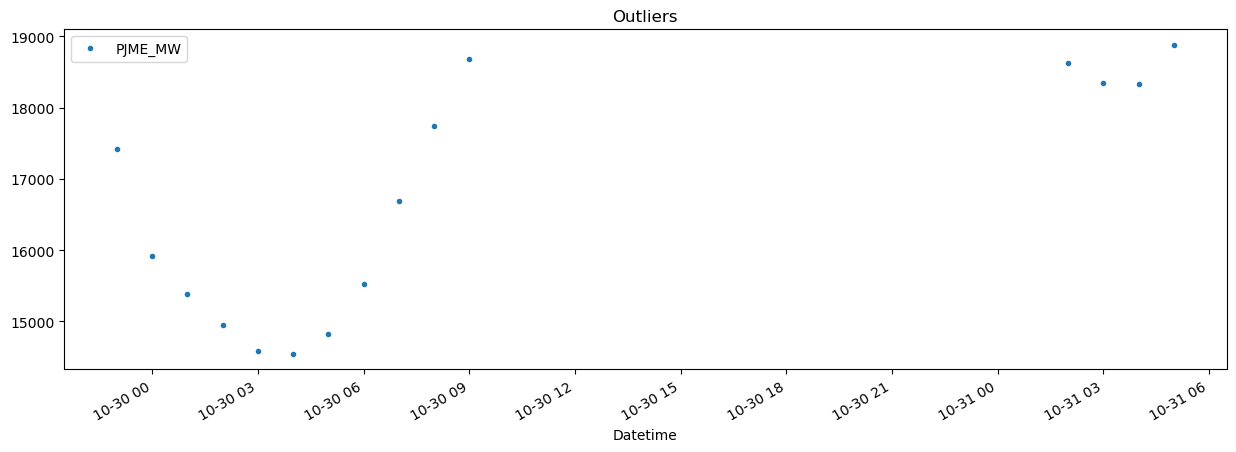

In [54]:
beta.query('PJME_MW < 19_000') .plot(style='.',figsize=(15, 5),title='Outliers')

In [55]:
beta = beta.query('PJME_MW > 19_000')

In [56]:
beta

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0
...,...
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0


## split & cross validation

In [57]:
tss = sklearn.model_selection.TimeSeriesSplit(n_splits=5, test_size=24*365*1, gap=24)

In [58]:
#we have time series DONT forget that the DATE values are the most important and need to be sorted
beta=beta.sort_index()

In [59]:
#beta

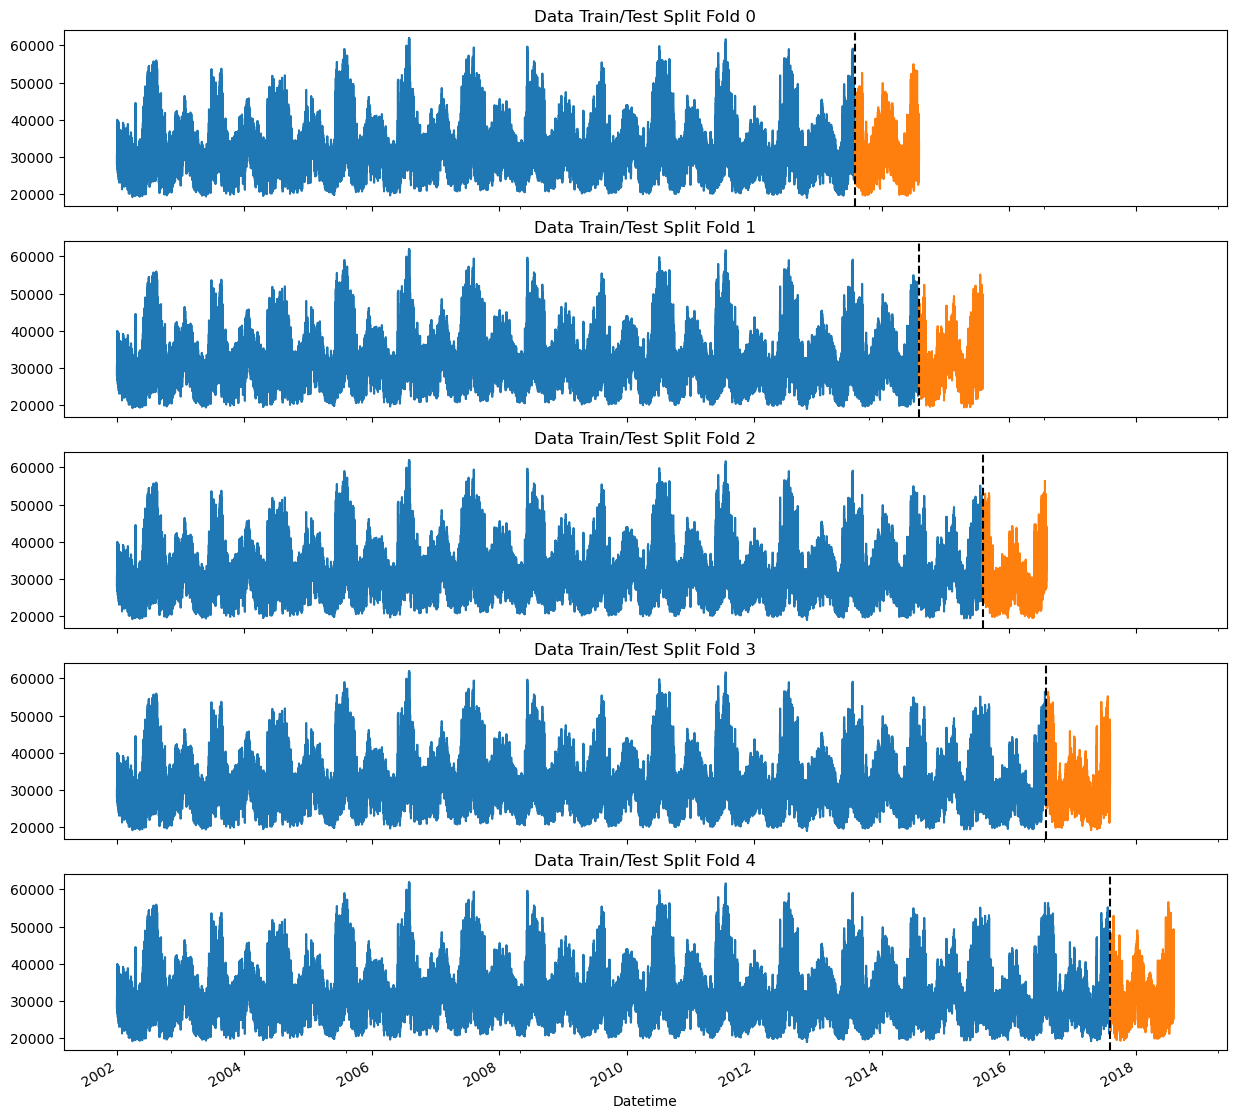

In [60]:
fig, axs = plt.subplots(5, 1, figsize=(15, 15), sharex=True)#share x axis


fold = 0
for train_idx, val_idx in tss.split(beta):
    train = beta.iloc[train_idx]
    test = beta.iloc[val_idx]
    train['PJME_MW'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['PJME_MW'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')#split line
    fold += 1
plt.show()

In [61]:
df=beta
df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek
df['quarter'] = df.index.quarter
df['month'] = df.index.month
df['year'] = df.index.year
df['dayofyear'] = df.index.dayofyear
df['dayofmonth'] = df.index.day
df['weekofyear'] = df.index.isocalendar().week

In [62]:
#df

In [63]:
target_map = df['PJME_MW'].to_dict()

In [64]:
#target_map

In [65]:
def add_lags(df):
    
    df['lag1'] = (df.index - pandas.Timedelta('364 days')).map(target_map)#
    df['lag2'] = (df.index - pandas.Timedelta('728 days')).map(target_map)
    df['lag3'] = (df.index - pandas.Timedelta('1092 days')).map(target_map)
    return df
#364 and not 365 because 364/7=52 weeks

In [66]:
df=add_lags(df)

In [68]:
df

,PJME_MW,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,lag1,lag2,lag3
Datetime,,,,,,,,,,,,
2002-01-01 01:00:00,30393.0,1,1,1,1,2002,1,1,1,NaN,NaN,NaN
2002-01-01 02:00:00,29265.0,2,1,1,1,2002,1,1,1,NaN,NaN,NaN
2002-01-01 03:00:00,28357.0,3,1,1,1,2002,1,1,1,NaN,NaN,NaN
2002-01-01 04:00:00,27899.0,4,1,1,1,2002,1,1,1,NaN,NaN,NaN
2002-01-01 05:00:00,28057.0,5,1,1,1,2002,1,1,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-02 20:00:00,44057.0,20,3,3,8,2018,214,2,31,42256.0,41485.0,38804.0
2018-08-02 21:00:00,43256.0,21,3,3,8,2018,214,2,31,41210.0,40249.0,38748.0
2018-08-02 22:00:00,41552.0,22,3,3,8,2018,214,2,31,39525.0,38698.0,37330.0


In [69]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)

# Train Using Cross Validation

In [70]:
#tss = TimeSeriesSplit(n_splits=5, test_size=24*365*1, gap=24)
df = df.sort_index()


fold = 0 #split set
preds = []
scores = []
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]

    train = create_features(train)
    test = create_features(test)

    FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month','year',
                'lag1','lag2','lag3']
    TARGET = 'PJME_MW'

    X_train = train[FEATURES]
    y_train = train[TARGET]

    X_test = test[FEATURES]
    y_test = test[TARGET]
    
    reg = xgboost.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,#trees-reps
                           early_stopping_rounds=50, 
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = numpy.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred))
    scores.append(score)

[11:25:41] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:32732.50147	validation_1-rmse:31956.66494
[100]	validation_0-rmse:12532.10915	validation_1-rmse:11906.70125
[200]	validation_0-rmse:5739.78666	validation_1-rmse:5352.86754
[300]	validation_0-rmse:3868.29390	validation_1-rmse:3891.32148
[400]	validation_0-rmse:3428.85875	validation_1-rmse:3753.95996
[456]	validation_0-rmse:3349.18480	validation_1-rmse:3761.64093
[11:26:33] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:32672.16154	validation_1-rmse:32138.88680
[100]	validation_0-rmse:12513.25338	validation_1-rmse:12222.97626
[200]	validation_0-rmse:5755.14393	validation_1-rmse:5649.54800
[300]	validation_0-rmse:3909.18294	validation_1-rmse:3930.98277
[400]	

In [71]:
scores

[3753.2775219986684,
 3434.3528874818867,
 3475.9138463312997,
 4093.3608331481823,
 3996.298054855067]

In [72]:
print(f'Score across folds {numpy.mean(scores):0.4f}')

Score across folds 3750.6406


In [73]:
#df

# PREDICTIONS

In [74]:
#df = create_features(df)

FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year',
            'lag1','lag2','lag3']
TARGET = 'PJME_MW'

X_all = df[FEATURES]
y_all = df[TARGET]

reg = xgboost.XGBRegressor(base_score=0.5,
                       booster='gbtree',    
                       n_estimators=500, #i give 500 cause thats where the overfitting starts as we've already seen before
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_all, y_all,
        eval_set=[(X_all, y_all)],
        verbose=100)

[11:30:55] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:32403.88753
[100]	validation_0-rmse:12426.44700
[200]	validation_0-rmse:5752.69704
[300]	validation_0-rmse:3970.08787
[400]	validation_0-rmse:3569.37848
[499]	validation_0-rmse:3454.55122


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [75]:
df.index.max()

Timestamp('2018-08-03 00:00:00')

In [76]:
future = pandas.date_range('2018-08-03','2019-08-01', freq='1h')

In [77]:
#future

In [78]:
#for _ in future: print(_)

In [79]:
future_df = pandas.DataFrame(index=future)

In [80]:
future_df['isFuture'] = True
df['isFuture'] = False

In [81]:
gamma = pandas.concat([df, future_df])

In [82]:
#gamma

In [83]:
gamma = create_features(gamma)

In [84]:
#gamma

In [86]:
gamma = add_lags(gamma)

In [87]:
#gamma

In [88]:
delta = gamma.query('isFuture').copy()#copy is not necessary(?)

In [89]:
delta

,PJME_MW,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,lag1,lag2,lag3,isFuture
2018-08-03 00:00:00,NaN,0,4,3,8,2018,215,3,31,33539.0,32094.0,31695.0,True
2018-08-03 01:00:00,NaN,1,4,3,8,2018,215,3,31,30781.0,29503.0,29128.0,True
2018-08-03 02:00:00,NaN,2,4,3,8,2018,215,3,31,29015.0,27712.0,27373.0,True
2018-08-03 03:00:00,NaN,3,4,3,8,2018,215,3,31,27884.0,26535.0,26233.0,True
2018-08-03 04:00:00,NaN,4,4,3,8,2018,215,3,31,27223.0,25870.0,25643.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-31 20:00:00,NaN,20,2,3,7,2019,212,31,31,46912.0,39352.0,40243.0,True
2019-07-31 21:00:00,NaN,21,2,3,7,2019,212,31,31,45985.0,38699.0,39183.0,True
2019-07-31 22:00:00,NaN,22,2,3,7,2019,212,31,31,44094.0,37346.0,37759.0,True
2019-07-31 23:00:00,NaN,23,2,3,7,2019,212,31,31,40666.0,34555.0,34641.0,True


In [90]:
delta['pred'] = reg.predict(delta[FEATURES])

In [91]:
delta

,PJME_MW,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,lag1,lag2,lag3,isFuture,pred
2018-08-03 00:00:00,NaN,0,4,3,8,2018,215,3,31,33539.0,32094.0,31695.0,True,30756.787109
2018-08-03 01:00:00,NaN,1,4,3,8,2018,215,3,31,30781.0,29503.0,29128.0,True,28554.314453
2018-08-03 02:00:00,NaN,2,4,3,8,2018,215,3,31,29015.0,27712.0,27373.0,True,28016.724609
2018-08-03 03:00:00,NaN,3,4,3,8,2018,215,3,31,27884.0,26535.0,26233.0,True,27383.017578
2018-08-03 04:00:00,NaN,4,4,3,8,2018,215,3,31,27223.0,25870.0,25643.0,True,27072.333984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-31 20:00:00,NaN,20,2,3,7,2019,212,31,31,46912.0,39352.0,40243.0,True,42223.007812
2019-07-31 21:00:00,NaN,21,2,3,7,2019,212,31,31,45985.0,38699.0,39183.0,True,41444.980469
2019-07-31 22:00:00,NaN,22,2,3,7,2019,212,31,31,44094.0,37346.0,37759.0,True,40697.593750
2019-07-31 23:00:00,NaN,23,2,3,7,2019,212,31,31,40666.0,34555.0,34641.0,True,38344.351562


The bad thing about time series predictions is that we can not chech if they we are right or 
wrong because only time can show us the final result. So we have to wait . . .

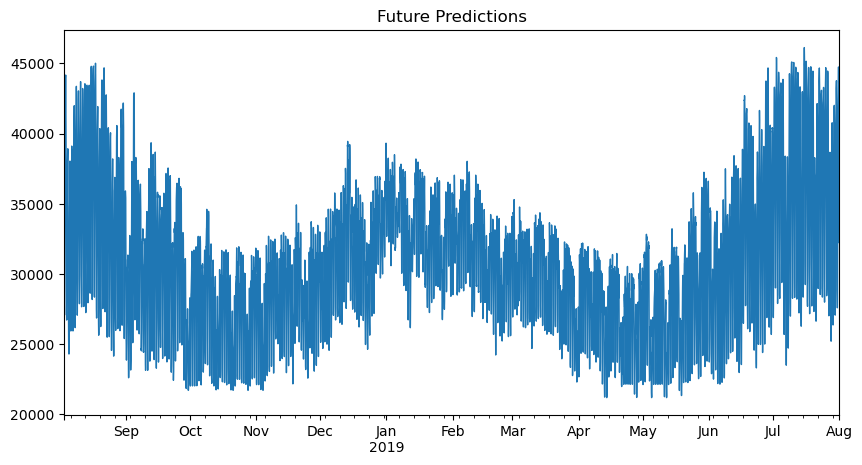

In [92]:
delta['pred'].plot(figsize=(10, 5),ms=1,lw=1,title='Future Predictions')
plt.show()

save n load a model :

In [93]:
reg.save_model('mySuperModel.json')#save

In [94]:
reg_new = xgboost.XGBRegressor()#creating new model
reg_new.load_model('mySuperModel.json')#loading model